# Value Function Approximation

## Review Numpy Inner Product
Vectors: $\mathbf{x}, \mathbf{w}$

Inner product: $\mathbf{x}^\top \mathbf{w}$

In [ ]:
import numpy as np
import random

In [1]:

x = np.array([1, 2])
w = np.array([3, 4])

ip = np.dot(x, w)
print(ip)

NameError: ignored

## Representing States with Feature Vectors
Let's decide how we represent states using features.

Define a function $x$ that maps a state to the corresponding feature vector

$$x(S_1) = [1,1]$$
$$x(S_2) = [2,1]$$

## Approximating Value Function
Now, instead of storing the value function $v$ in a table, let's parameterize $v$ with weight $\mathbf{w}$.

$$v(S,\mathbf{w}) = x(S)^\top \mathbf{w}= \sum_j x_j(S)\mathbf{w}_j$$

e.g. If $\mathbf{w} = [1,1]$, the V value of state $S_1$ and $S_2$ are:

In [ ]:
xs1 = np.array([1, 1])
xs2 = np.array([1, 2])
w = np.array([1, 1])

vs1 = np.dot(xs1, w)
vs2 = np.dot(xs2, w)
print(f'V(S1) = {vs1}, V(S2) = {vs2}')

V(S1) = 2, V(S2) = 3


So if we change $\mathbf{w}$, we can change the value function.

But how do we choose a nice $\mathbf{w}$ to have an accurate V values for all states?

We want to approximate TRUE value function $v$. Assume a blackbox algorithm gave us the true value funcrion. For example, $v(S_1) = 4$, and $v(S_2) = 6$.








----------------------------
I think you can understand the benefits of function approx now, comparing it with the tabular method.
1. Even when you visit a state (e.g. $S_1$), the value function of the other states is also updated (e.g. $S_2$).
2. You can reduce memory to save the value function. Imagine you have 1 million states like $S_1$. If it's the tabular method, you need to store 1 million entries of $(s, v(s))$. If it's function approx, you only store two numbers $w = (w_1, w_2)$.
----------------------------

In [ ]:
w = np.array([2, 2])

vs1 = np.dot(xs1, w)
vs2 = np.dot(xs2, w)
print(f'V(S1) = {vs1}, V(S2) = {vs2}')

V(S1) = 4, V(S2) = 6


So we know $\mathbf{w}^* = [2,2]$ is the best parameter approximating $v$. 

Is there any way to find such $\mathbf{w}^*$? The best $\mathbf{w}^*$ should minimize the loss function:
$$J(\mathbf{w})=\mathbb{E}_{\pi}\left[\left(v(S)-\mathbf{x}(S)^{\top} \mathbf{w}^*\right)^{2}\right]$$
This is becase, in the ideal scenario, $v(s) = \mathbf{x}(S)^{\top} \mathbf{w}^*$

Here, it is a simple minimization of function $J(\mathbf{w})$. Therefore, we can use the gradient descent method to solve it.

$$\begin{aligned} \Delta \mathbf{w} &=-\frac{1}{2} \alpha \nabla_{\mathbf{w}} J(\mathbf{w}) \\ &=\alpha \mathbb{E}_{\pi}\left[\left(v_{\pi}(S)-\hat{v}(S, \mathbf{w})\right) \nabla_{\mathbf{w}} \hat{v}(S, \mathbf{w})\right] \end{aligned}$$

Then, $$\mathbf{w} \gets \mathbf{w} + \Delta \mathbf{w}$$

If it is stochastic GD, we can use the following:
$$\Delta \mathbf{w}=\alpha\left(v_{\pi}(S)-\hat{v}(S, \mathbf{w})\right) \nabla_{\mathbf{w}} \hat{v}(S, \mathbf{w})$$

Since we have $v(s) = \mathbf{x}(S)^{\top} \mathbf{w}^*$, $$\nabla_{\mathbf{w}} v(S, \mathbf{w}) = x(S).$$

In [ ]:
num_iter = 10000

# step size
alpha = 0.02

true_vs1 = 4
true_vs2 = 6

# initialization
w = np.array([1,1])

# randomly pick one of the states 
# and execute the stochastic gradient

for i in range(num_iter):
  if random.random() < 0.5:
    xs = xs1
    true_vs = true_vs1
  else:
    xs = xs2
    true_vs = true_vs2

  vs = np.dot(xs, w)
  w = w + alpha * (true_vs - vs) * xs

  J = pow(true_vs - vs, 2)

  # Print every 1000 rounds
  if i % 1000 == 0:
    print(f'w: {w}')

print(f'Final w: {w}')

NameError: ignored

However, we do not know the true value function in an arbitaral MDP. (This was the motivation why we started learning RL.) 

What we have access to is sequences of $s, a, r, s^\prime, ...$. We know how we can estimate the true $v$ using a lot of experiences by MC, TD, and other control methods!

If it is MC, we can use return $G_t$ of an episode. We can simply replace the $v_{\pi}(S)$ term in SGD with $G_t$.

$$\Delta \mathbf{w}=\alpha\left(G_t-\hat{v}(S, \mathbf{w})\right) \nabla_{\mathbf{w}} \hat{v}(S, \mathbf{w})$$

For example,
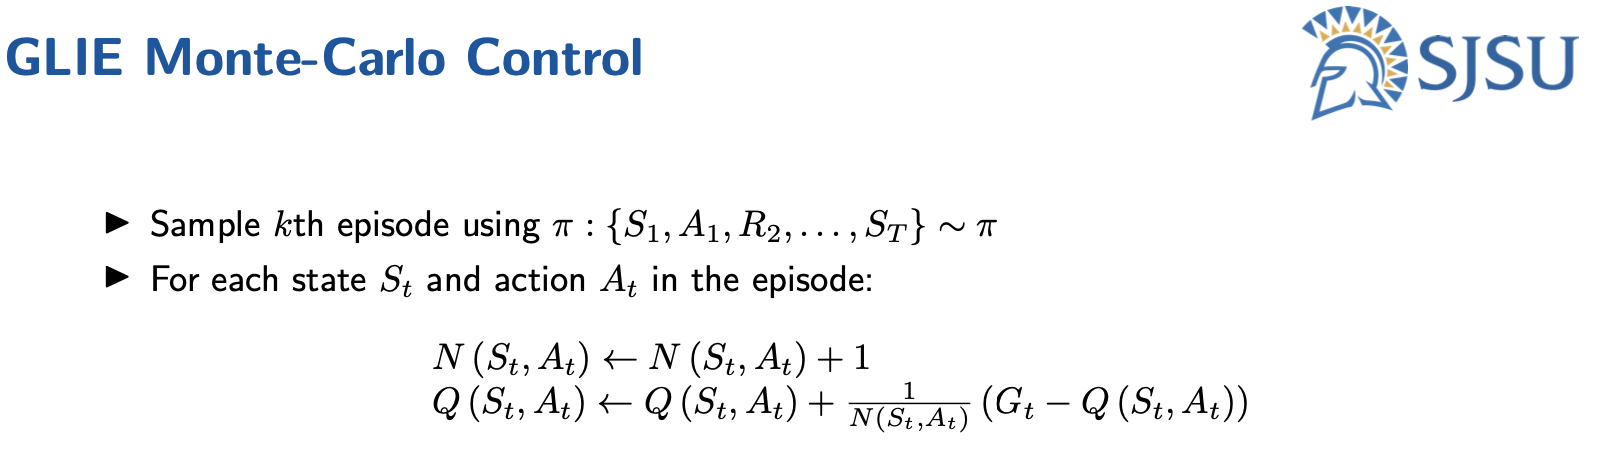

# Policy Gradient

We can do a similar thing to represent a policy. With value function-based methods, we distilled a policy from the value functions. e.g.

$$\pi(a \mid s) \begin{cases}= 1 \text{ if } a = \operatorname{argmax}_a Q(s,a)\\ = 0 \text{ otherwise}\end{cases}$$

Instead, let's define a policy function using a parapmeter $\theta$. e.g. Softmax policy function is:

$$\pi_{\theta}(s, a)=\dfrac{e^{\phi(s, a)^{\top} \theta}}{\sum_{k=1}^{N} e^{\phi\left(s, a_{k}\right)^{\top} \theta}},$$
where $\phi(s, a)$ is a feature vector of a state-action pair $(s,a)$.

Again, when we move $\theta$, the policy $\pi$ changes.

Which direction should we move the parameter $\theta$? We want to maximize the expected return by choosing a right policy. One way to define the objective is:

$$J_{1}(\theta)=V^{\pi_{\theta}}\left(s_{1}\right)=\mathbb{E}_{\pi_{\theta}}\left[v_{1}\right]$$

Then, the direction to which we should move $\theta$ is $\nabla_\theta J_1$. We just need to know $\nabla_\theta \pi_\theta (s,a)$, which is equal to $\pi_\theta (s,a)\nabla_\theta \log\pi_\theta (s,a)$.

[OpenAI Reference](https://spinningup.openai.com/en/latest/spinningup/rl_intro3.html)

For example, $\nabla_\theta \log\pi_\theta (s,a)$ of the softmax policy is:

$$\nabla_{\theta} \log \pi_{\theta}(s, a)=\phi(s, a)-\mathbb{E}_{\pi_{\theta}}[\phi(s, \cdot)]$$

Therefore,
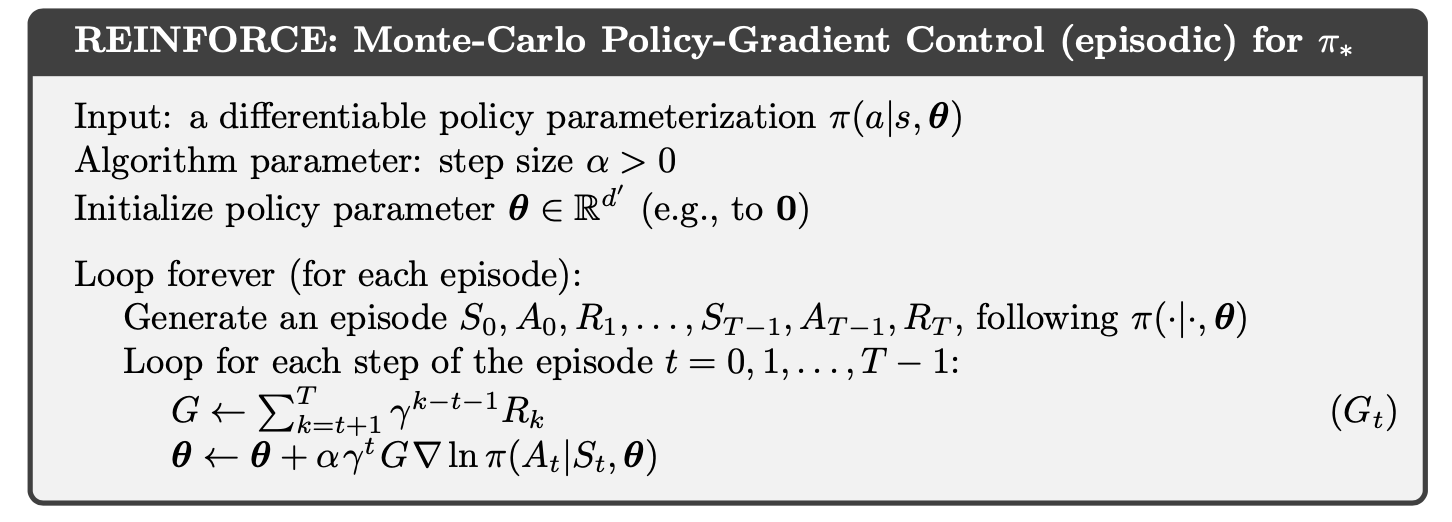

In [ ]:
# Suppose we are using the softmax policy
# We have two actions from each state: A1 and A2
# (s,a) encoding: phi(S1,A1) = (1,1), phi(S1,A2) = (2,1), phi(S2,A1) = (2,3), phi(S2,A2) = (2,1)
# Assume we experienced an episode: S1, A1, 4, S2, A2, 10, S3

# softmax policy
def smp(phi_sa):
  # implement the policy
  np.exp(...)
  return prob_sa


alpha = 0.02
gamma = 0.6

# init theta
theta = [0.5,0.5]

for t in range(2):
  # Compute Gt
  # update theta (call smp function)